In [1]:
import os
import boto3
from pathlib import Path
from IPython.display import Image
from common.pix4d_libs import get_jwt, get_outputs, project_s3_creds, get_s3_client

In [2]:
PIX4D_CLIENT_ID = os.environ['PIX4D_CLIENT_ID']
PIX4D_CLIENT_SECRET = os.environ['PIX4D_CLIENT_SECRET']
assert PIX4D_CLIENT_ID
assert PIX4D_CLIENT_SECRET

In [3]:
my_jwt = get_jwt(PIX4D_CLIENT_ID, PIX4D_CLIENT_SECRET)

In [4]:
# This is one of the demo project:
# https://cloud.pix4d.com/dataset/256164/map?shareToken=97a07d231fbc47b1b105d6cc7bcab0a4
project_id = 256164

# You can access your own projects without a share token.
project_share_token = "97a07d231fbc47b1b105d6cc7bcab0a4"

In [5]:
outputs = get_outputs(project_id, my_jwt, share_token=project_share_token)

In [14]:
outputs

{'outputs': [{'result_type': 'project_zip',
   'output_type': 'project_zip',
   'availability': 'done',
   's3_key': 'user-105714/project-256164/example_quarry2_full.zip',
   's3_bucket': 'prod-pix4d-cloud-default',
   's3_region': 'us-east-1',
   'output_id': 140672588},
  {'result_type': 'dsm_cloud_optimized',
   'output_type': 'dsm_cloud_optimized',
   'availability': 'done',
   's3_key': 'user-105714/project-256164/post_processing/dsm/cloud_optimized_dsm.tif',
   's3_bucket': 'prod-pix4d-cloud-default',
   's3_region': 'us-east-1',
   'output_id': 140668328},
  {'result_type': 'input_zip',
   'output_type': 'input_zip',
   'availability': 'done',
   's3_key': 'user-105714/project-256164/example_quarry2_inputs.zip',
   's3_bucket': 'prod-pix4d-cloud-default',
   's3_region': 'us-east-1',
   'output_id': 139059535},
  {'result_type': 'ortho',
   'output_type': 'ortho_rgb',
   'availability': 'done',
   's3_key': 'user-105714/project-256164/post_processing/ortho/example_quarry2_rgb_or

In [7]:
ortho_thumb = [i for i in outputs['outputs'] if i['result_type'] == 'ortho' and i['output_type'] == 'ortho_thumb']
if ortho_thumb:
    ortho_thumb = ortho_thumb[0]
else:
    print('Failed to find ortho')

In [10]:
s3_creds = project_s3_creds(project_id, my_jwt, share_token=project_share_token)

In [11]:
s3_client = get_s3_client(project_id, my_jwt, share_token=project_share_token)

In [12]:
local_file_name = 'ortho_thumb.png'
s3_client.download_file(ortho_thumb['s3_bucket'], ortho_thumb['s3_key'], local_file_name)

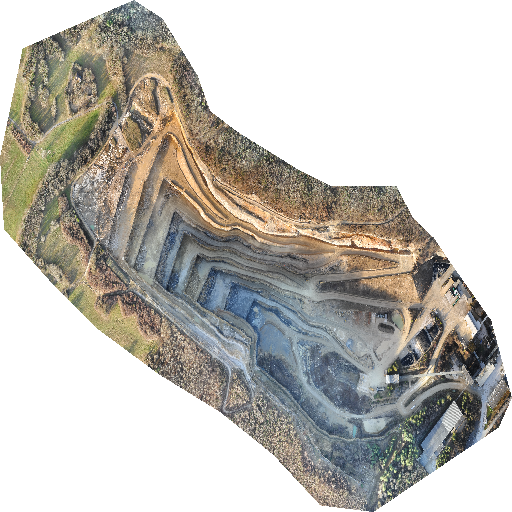

In [13]:
Image(local_file_name)